In [2]:
using TopoMap
using Plots, Distributions, MLDatasets, Random 
pyplot();


** (process:3351): WARNING **: 11:26:19.322: Failed to load shared library 'libpango-1.0.so.0' referenced by the typelib: /usr/lib/libpango-1.0.so.0: undefined symbol: hb_ot_layout_get_horizontal_baseline_tag_for_script


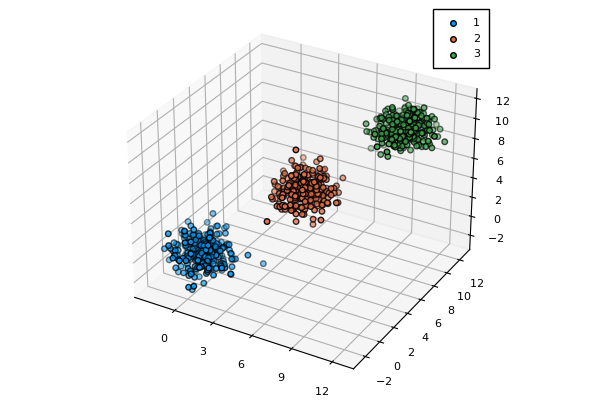

In [2]:
data = rand(Normal(0), (3, 266))
labels = repeat([1], 266)
data = hcat(data, rand(Normal(5), (3,266)))
append!(labels, repeat([2],266))
data = hcat(data, rand(Normal(10), (3,267)))
append!(labels, repeat([3],267))
scatter(data[1,:], data[2,:], data[3,:], group=labels, fmt =:png)
#savefig("3d-spheres")

Computing EMST...
--> ngroups: 799
--> ngroups: 224
--> ngroups: 53
--> ngroups: 10
--> ngroups: 3
Placing points...
(799,)
(2, 799)
  3.856009 seconds (52.05 M allocations: 2.507 GiB, 14.66% gc time, 8.64% compilation time)


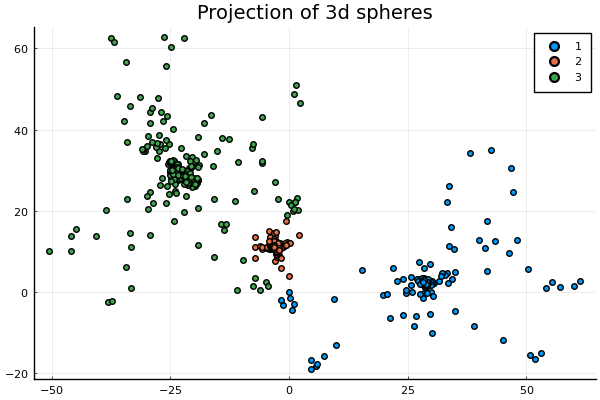

In [3]:
#@time tm, _ = TopoMap.project(data, 10 ,true);
@time tm = TopoMap.project(data, 1, true);
scatter(tm[1,:], tm[2,:],group=labels, title = "Projection of 3d spheres", fmt =:png)
#savefig("projection-3d-spheres")

In [4]:
#Iris.download(; i_accept_the_terms_of_use=true);
iris_features = Iris.features();
iris_labels = Iris.labels();

In [ ]:
#unique_rows = unique(vcat(iris_features, reshape(iris_labels,(1,150))), dims=2)
#iris_labels = unique_rows[5,:]
#iris_features = Array{Float64,2}(unique_rows[1:4,:]);

In [5]:
#@time tm_iris, steps = TopoMap.project(iris_features, 10, true);
@time tm_iris = TopoMap.project(iris_features, 1, true);

Computing EMST...
--> ngroups: 150
--> ngroups: 42
--> ngroups: 8
--> ngroups: 3
Placing points...
(150,)
(2, 150)
  0.151781 seconds (1.58 M allocations: 99.486 MiB, 15.95% gc time)


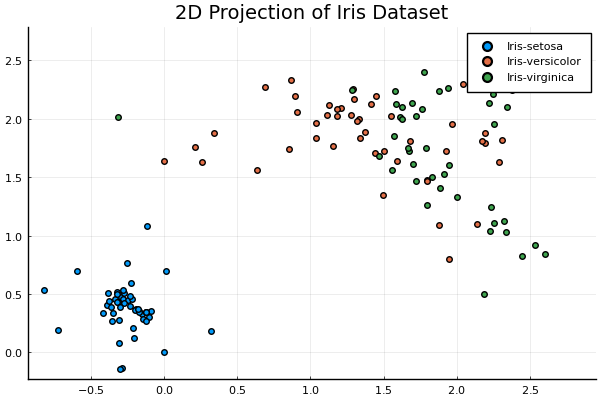

In [6]:
scatter(tm_iris[1,:], tm_iris[2,:], group=iris_labels,title = "2D Projection of Iris Dataset", fmt =:png)
#savefig("projection-iris")

## Generate .gif

In [ ]:
#xMax = maximum(tm_iris[1,:])
#xMin = -xMax
#yMax = maximum(tm_iris[2,:])
#yMin =-yMax
#anim = @animate for i in 1:length(steps)
#    step = steps[i]
#    res = Array{Float64,2}(undef, 2, length(step))
#    for i in eachindex(step)
#        res[1, i] = step[i].p.x
#        res[2, i] = step[i].p.y
#    end
#    scatter(res[1,:], res[2,:],group=iris_labels,xlim=(xMin,xMax), ylim=(yMin, yMax))
#end

In [ ]:
#gif(anim, fps=5)

## 3d projection of Iris data

In [ ]:
#@time tm_iris_3d, steps = TopoMap.project(iris_features, 3, 10, true);

In [ ]:
#scatter(tm_iris_3d[1,:], tm_iris_3d[2,:], tm_iris_3d[3,:],group=iris_labels,title = "3D Projection of Iris Dataset")

In [247]:
using LinearAlgebra
function rotate_x(X, theta)
    T = Matrix{Float64}(I, 4, 4)
    R = [
        1.0 0.0 0.0 0.0
        0.0 cos(theta) -sin(theta) 0.0
        0.0 sin(theta) cos(theta) 0.0
        0.0 0.0 0.0 1.0
    ]

    RT = R * T
    println(size(X), size(RT))
    println(X)
    return (X'*RT)
end

rotate_x (generic function with 1 method)

[3.0 3.0 0.0; 0.0 3.0 0.0; 0.0 3.0 3.0]
[1.0 1.0 -2.0; -1.0 2.0 -1.0; -2.0 1.0 1.0]


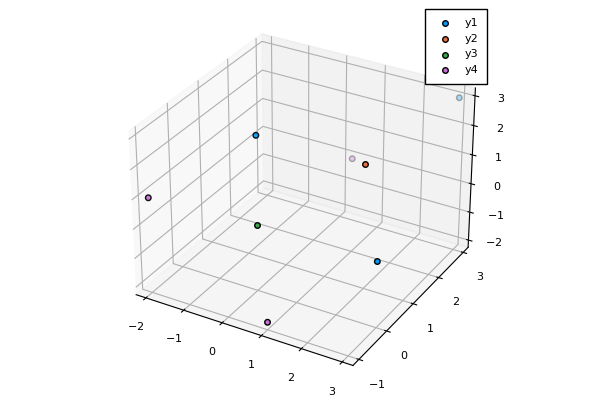

In [187]:
X = [
    3.0 3.0 0.0
    0.0 3.0 0.0
    0.0 3.0 3.0
]
centroid = compute_centroid(X)
centered = (X .- centroid)
println(centered)
scatter(X[1,:], X[2,:], X[3,:])
scatter!(centroid[1,:],centroid[2,:],centroid[3,:])
scatter!([0],[0],[0])
scatter!(centered[1,:], centered[2,:], centered[3,:])

In [202]:
centered_hc =[centered; 1. 1. 1.]
println(centered_hc)


[1.0 1.0 -2.0; -1.0 2.0 -1.0; -2.0 1.0 1.0; 1.0 1.0 1.0]


In [203]:

function normalize_vec(X)
    norm = sum(sqrt(dot(X,X)))
    if norm != 0.
        return X / norm
    else
        return X
    end
end
function normal_vector(triangles)
    return cross(normalize_vec(triangles[:, 2] - triangles[:, 1]),
    normalize_vec(triangles[:, 3] - triangles[:, 1]))
end


normal_vector (generic function with 1 method)

In [204]:
z_norm = [0. 0. 1.]
norm = -normal_vector(X)

3-element Vector{Float64}:
 -0.5000000000000001
  0.5000000000000001
 -0.5000000000000001

In [229]:
function rotation_matrix(A::Array{Float64}, B::Array{Float64})
    M = Matrix{Float64}(I, 4, 4)
    M[1:3,3] = normalize_vec(A)
    M[1:3,2] .= normalize_vec(dot(A,B))
    M[1:3,1] = normalize_vec(cross(M[1:3,2], A))
    return M
end

rotation_matrix (generic function with 1 method)

In [230]:
R3 = rotation_matrix(norm, z_norm)
T = Matrix{Float64}(I, 4, 4)
RT = R3 * T

4×4 Matrix{Float64}:
  0.707107  -1.0  -0.57735  0.0
  0.0       -1.0   0.57735  0.0
 -0.707107  -1.0  -0.57735  0.0
  0.0        0.0   0.0      1.0

In [231]:
centered_hc

4×3 Matrix{Float64}:
  1.0  1.0  -2.0
 -1.0  2.0  -1.0
 -2.0  1.0   1.0
  1.0  1.0   1.0

In [242]:
z_centered = (centered_hc'*RT)'

4×3 adjoint(::Matrix{Float64}) with eltype Float64:
 2.12132   0.0  -2.12132
 2.0      -4.0   2.0
 0.0       0.0   0.0
 1.0       1.0   1.0

In [248]:
rotated_x = rotate_x(z_centered, pi/2)[:,1:3]

(4, 3)(4, 4)
[2.121320343559643 0.0 -2.121320343559643; 2.0 -4.0 2.0; 0.0 0.0 0.0; 1.0 1.0 1.0]


3×3 Matrix{Float64}:
  2.12132   1.22465e-16  -2.0
  0.0      -2.44929e-16   4.0
 -2.12132   1.22465e-16  -2.0

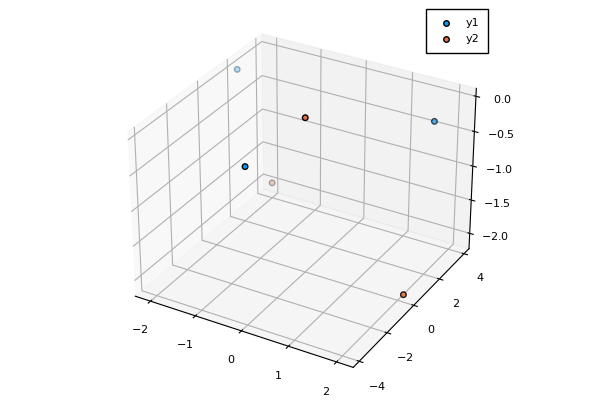

In [241]:
scatter(z_centered[1,:], z_centered[2,:], z_centered[3,:])
scatter!(rotated_x[1,:], rotated_x[2,:], rotated_x[3,:])